# Simulation of the Ising modell for zero field

## setup

In [1]:
include("../src/ising.jl")
import CairoMakie as plt
using JLD2

## Anaylsis

In [2]:
data = load("../data/finite_size_scaling.jld2")

Dict{String, Any} with 4 entries:
  "grid_sizes"     => [10, 12, 14, 16, 18, 20, 22]
  "temps"          => Any[[4.0, 4.0101, 4.0202, 4.0303, 4.0404, 4.05051, 4.0606…
  "energies"       => Any[([-1896.83, -1901.83, -1877.42, -1874.13, -1862.76, -…
  "magnetisations" => Any[([0.74699, 0.749486, 0.740792, 0.740068, 0.737424, 0.…

In [3]:
grid_sizes = data["grid_sizes"]
temps = data["temps"]
energies = data["energies"]
magnetisations = data["magnetisations"];

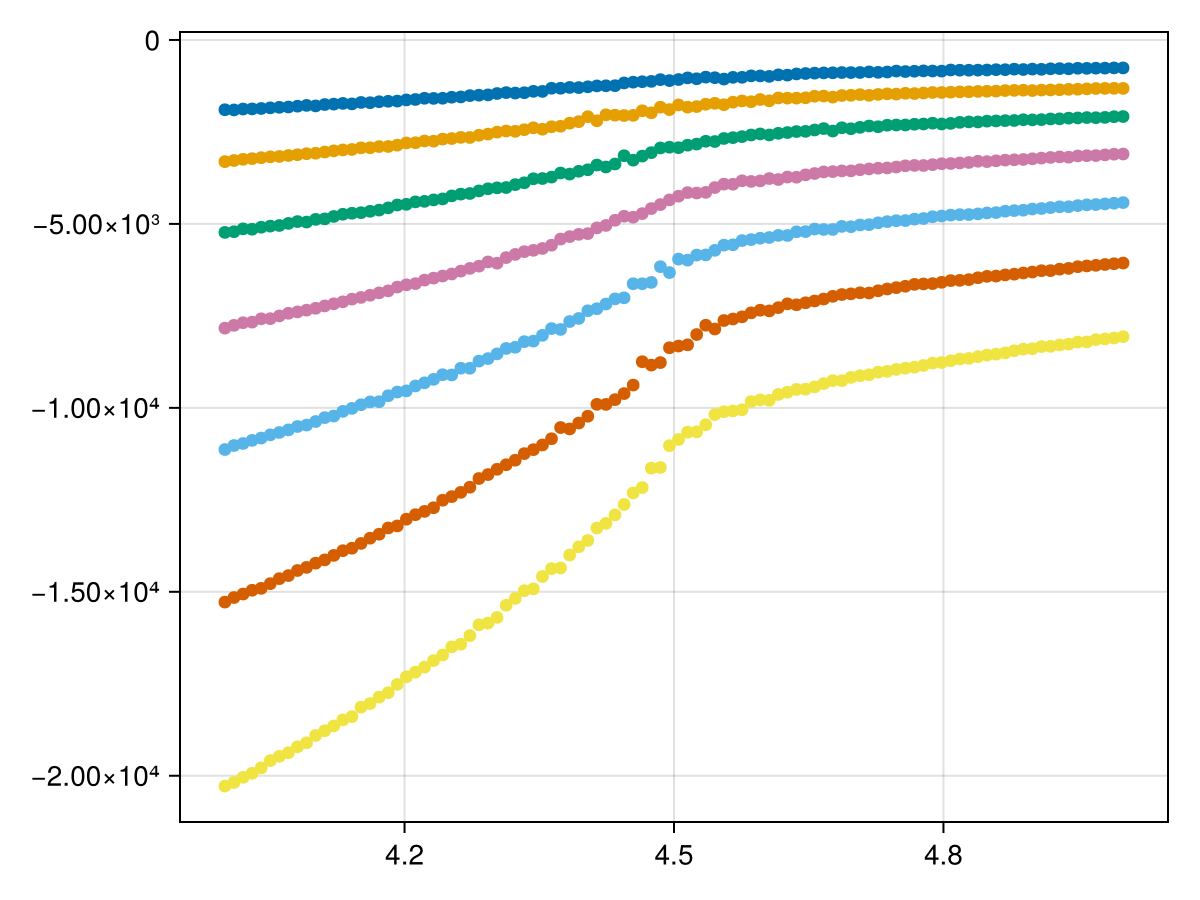

In [4]:
fig = plt.Figure()
ax = plt.Axis(fig[1,1])
for (grid_size, energies_, temps_) in zip(grid_sizes, energies, temps)
    plt.plot!(ax, temps_, energies_[1], label="L = $grid_size")
end
fig

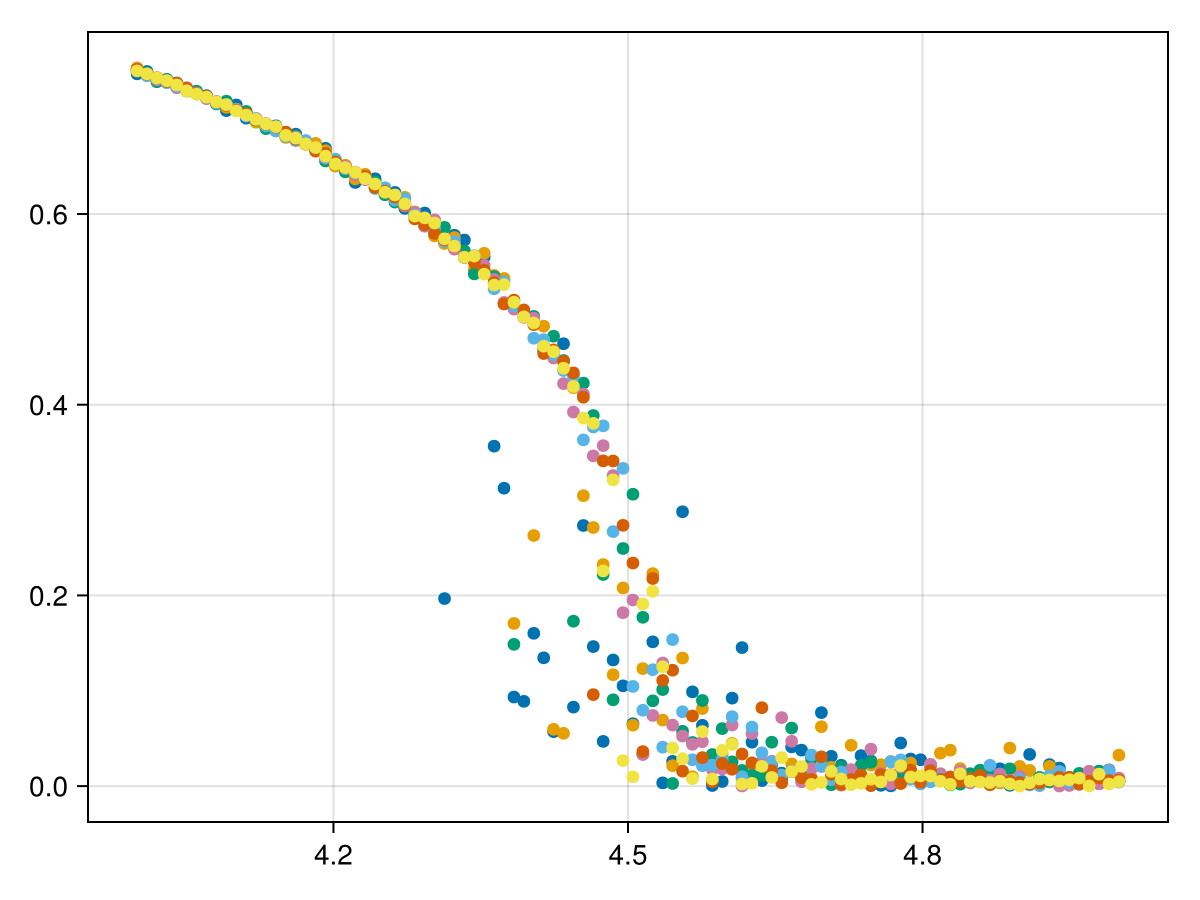

In [5]:
fig = plt.Figure()
ax = plt.Axis(fig[1,1])
for (grid_size, magnetisations_, temps_) in zip(grid_sizes, magnetisations, temps)
    plt.plot!(ax, temps_, abs.(magnetisations_[1]), label="L = $grid_size")
end
fig

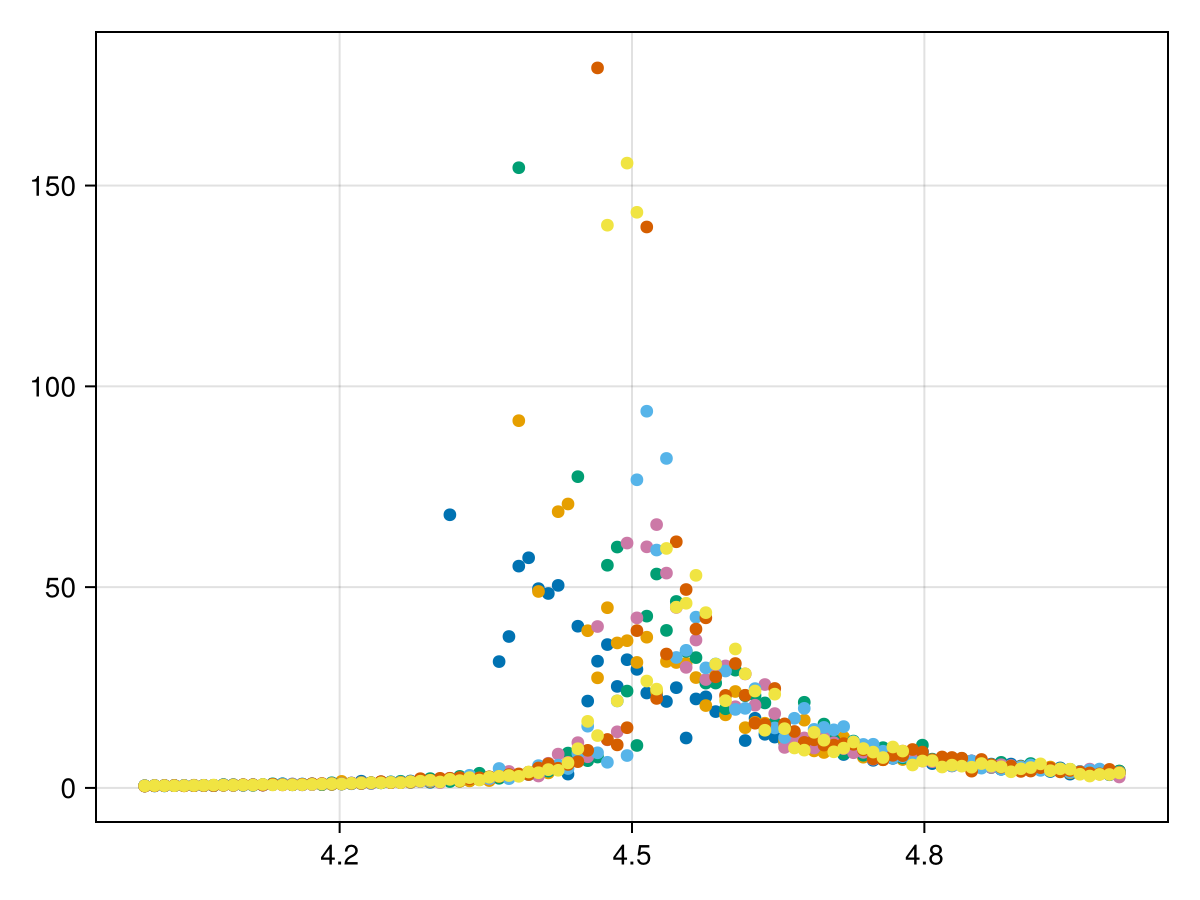

In [6]:
fig = plt.Figure()
ax = plt.Axis(fig[1,1])
for (grid_size, magnetisations_, temps_) in zip(grid_sizes, magnetisations, temps)
    susceptibilities = magnetisations_[2] .^2 ./ temps_ .* grid_size^3
    plt.plot!(temps_, susceptibilities, label="L = $grid_size")
end
fig